In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [249]:
Tennis = pd.read_csv("Tennis.csv") 

## 1. Data Cleaning/Processing

In [250]:
#update wt/ht to make int (also remove parentheses and kg/cm)
Tennis.ht = pd.Series([int(re.sub("[cm()]",'',str(x))) if x is not np.nan else x for x in Tennis.ht])
Tennis.wt = pd.Series([int(re.sub("[kg()]",'',str(x))) if x is not np.nan else x for x in Tennis.wt])

In [251]:
#Split Tennis into Ten0/Ten1 based on having missing birthplace
Ten0 = Tennis[Tennis.birthplace.isna()] 
Ten1 = Tennis[Tennis.birthplace.notna()]


In [252]:
Tennis.shape

(1934, 16)

In [253]:
#Compare both groups
print('Median0= ', Ten0['rank_2020'].median())
print('Median1= ',Ten1['rank_2020'].median())

print('N0: ', Ten0.shape[0])
print('N1: ', Ten1.shape[0])

print('Min0= ', Ten0[Ten0.rank_2020 != 0]['rank_2020'].min())
print('Min1= ',Ten1['rank_2020'].min())

print('Max0= ', Ten0['rank_2020'].max())
print('Max1= ',Ten1['rank_2020'].max())

Median0=  1283.5
Median1=  482.0
N0:  1064
N1:  870
Min0=  148
Min1=  0
Max0=  1928
Max1=  1922


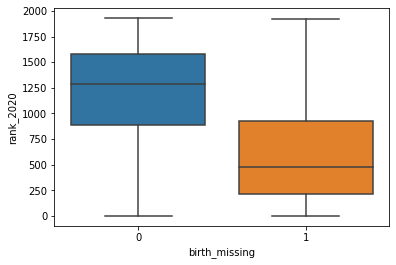

In [254]:
#Compare both groups using boxplot

Tennis['birth_missing'] = np.where(Tennis.birthplace.isna(), '0', '1')

sns.boxplot(x="birth_missing", y="rank_2020", data=Tennis)
plt.show()

In [187]:
#Study will focus on Ten1 group only (N=870)

### Clean up Ten1

In [255]:
#Look at missing in Ten1 group (looks fairly solid)
Ten1.isnull().sum()

age                1
backhand           1
birthplace         0
f_name             0
finals_career      0
ht                34
l_hand             1
l_name             0
loss_career        0
prize_career       0
rank_2020          0
rank_career        0
titles_career      0
win_career         0
wt                22
yr_pro           490
dtype: int64

In [256]:
#missing stats for ht/wt
Ten1[Ten1.ht.isna() & Ten1.wt.isna()].isnull().sum() #remove those having both ht/wt missing (21 total)

age               0
backhand          1
birthplace        0
f_name            0
finals_career     0
ht               21
l_hand            1
l_name            0
loss_career       0
prize_career      0
rank_2020         0
rank_career       0
titles_career     0
win_career        0
wt               21
yr_pro           21
dtype: int64

In [257]:
Ten1[Ten1.ht.notna() | Ten1.wt.notna()].isnull().sum() #this is what we will keep (mutate NA's)--850 total remain

age                1
backhand           0
birthplace         0
f_name             0
finals_career      0
ht                13
l_hand             0
l_name             0
loss_career        0
prize_career       0
rank_2020          0
rank_career        0
titles_career      0
win_career         0
wt                 1
yr_pro           469
dtype: int64

In [258]:
#remove yr_pro (since missing significantly, will not be used)
Ten1.drop('yr_pro', axis=1, inplace=True)
Ten1.shape #shape before removing missing (ck)

/Users/joehaber/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(870, 15)

In [192]:
# remove remaining ht/wt NA's (N=849)

In [259]:
#remove all ht or wt not NA (remove if missing both ht/wt)
Ten1 = Ten1[Ten1.ht.notna() | Ten1.wt.notna()]
Ten1.shape #shape after removing missing (ck)

(849, 15)

In [260]:
#fill remaining NA's with mean for respective cols
Ten1.fillna(Ten1.mean(), inplace=True)

#ck for any remaining NA's (should not be any)
Ten1.isnull().sum()

age              0
backhand         0
birthplace       0
f_name           0
finals_career    0
ht               0
l_hand           0
l_name           0
loss_career      0
prize_career     0
rank_2020        0
rank_career      0
titles_career    0
win_career       0
wt               0
dtype: int64

### Clean up birthplace

In [261]:
#replace errors in birthplace (typos)
Ten1.loc[Ten1['birthplace'].str.contains('U.S.A.'), 'birthplace'] = 'USA'
Ten1.loc[Ten1['birthplace'].str.contains('CA'), 'birthplace'] = 'USA'
Ten1.loc[Ten1['birthplace'].str.contains('California'), 'birthplace'] = 'USA'
Ten1.loc[Ten1['birthplace'].str.contains('Florida'), 'birthplace'] = 'USA'
Ten1.loc[Ten1['birthplace'].str.contains('Ohio'), 'birthplace'] = 'USA'
Ten1.loc[Ten1['birthplace'].str.contains('NC'), 'birthplace'] = 'USA'
Ten1.loc[Ten1['birthplace'].str.contains('New York'), 'birthplace'] = 'USA'
Ten1.loc[Ten1['birthplace'].str.contains('Illinois'), 'birthplace'] = 'USA'
Ten1.loc[Ten1['birthplace'].str.contains('IA'), 'birthplace'] = 'USA'
Ten1.loc[Ten1['birthplace'].str.contains('IL'), 'birthplace'] = 'USA'
Ten1.loc[Ten1['birthplace'].str.contains('OH'), 'birthplace'] = 'USA'
Ten1.loc[Ten1['birthplace'].str.contains('Idaho'), 'birthplace'] = 'USA'
Ten1.loc[Ten1['birthplace'].str.contains('Michigan'), 'birthplace'] = 'USA'
Ten1.loc[Ten1['birthplace'].str.contains('Scotland'), 'birthplace'] = 'England'
Ten1.loc[Ten1['birthplace'].str.contains('Great Britain'), 'birthplace'] = 'England'
Ten1.loc[Ten1['birthplace'].str.contains('Bosnia & Herzegovina'), 'birthplace'] = 'Bosnia-Herzegovina'
Ten1.loc[Ten1['birthplace'].str.contains('Cyrprus'), 'birthplace'] = 'Cyprus'
Ten1.loc[Ten1['birthplace'].str.contains('South Australia'), 'birthplace'] = 'Australia'
Ten1.loc[Ten1['birthplace'].str.contains('Slovak Republic'), 'birthplace'] = 'Slovakia'
Ten1.loc[Ten1['birthplace'].str.contains('CZE'), 'birthplace'] = 'Czech Republic'
Ten1.loc[Ten1['birthplace'].str.contains('chile'), 'birthplace'] = 'Chile'
Ten1.loc[Ten1['birthplace'].str.contains('BRA'), 'birthplace'] = 'Brazil'
Ten1.loc[Ten1['birthplace'].str.contains('Chinese Taipei'), 'birthplace'] = 'Taiwan'
Ten1.loc[Ten1['birthplace'].str.contains('The Netherlands'), 'birthplace'] = 'Netherlands'

In [262]:
Ten1.shape

(849, 15)

In [263]:
Ten1[Ten1.rank_2020 == 0]

,age,backhand,birthplace,f_name,finals_career,ht,l_hand,l_name,loss_career,prize_career,rank_2020,rank_career,titles_career,win_career,wt
219,22.0,Two-Handed Backhand,Spain,Miguel,0,180.0,Right-Handed,Semmler,0,57577.0,0,514,0,0,64.0
478,32.0,Unknown Backhand,Belgium,Niels,0,191.0,Right-Handed,Desein,3,412570.0,0,154,0,0,85.0
660,25.0,One-Handed Backhand,USA,Nicholas,0,188.0,Right-Handed,Reyes,0,12980.0,0,1223,0,0,83.0
1121,22.0,Unknown Backhand,Korea,Sanhui,0,180.0,Right-Handed,Shin,0,9788.0,0,823,0,0,75.0
1248,32.0,Two-Handed Backhand,Croatia,Franko,0,196.0,Right-Handed,Skugor,23,1467764.0,0,145,0,8,95.0
1416,18.0,Unknown Backhand,France,Harold,0,178.0,Right-Handed,Mayot,0,12648.0,0,509,0,0,78.0


In [264]:
#remove 4 rows having rank_2020=0 (mostly trivial values)--6?
Ten1 = Ten1[Ten1.rank_2020 != 0]

In [265]:
print('Final N for Ten1: ', Ten1.shape[0])

Final N for Ten1:  843


In [266]:
Ten1.groupby('rank_2020')['rank_2020'].count().sort_values(ascending=False)

rank_2020
1662    11
1747     9
1580     8
1811     6
1467     4
1886     4
1855     3
1387     3
1394     3
1415     3
1429     3
1521     3
1302     3
1320     2
1341     2
1333     2
1297     2
1284     2
1082     2
1005     2
1268     2
1066     2
1254     2
1232     2
1353     2
844      2
846      2
1140     2
1437     2
1565     2
1556     2
978      2
609      2
252      1
241      1
255      1
254      1
253      1
251      1
242      1
245      1
250      1
249      1
247      1
243      1
246      1
244      1
257      1
256      1
1922     1
258      1
259      1
282      1
281      1
280      1
279      1
278      1
277      1
276      1
275      1
274      1
272      1
271      1
270      1
269      1
238      1
267      1
266      1
265      1
264      1
263      1
262      1
260      1
240      1
225      1
237      1
236      1
210      1
209      1
208      1
207      1
206      1
205      1
204      1
203      1
202      1
201      1
200      1
199      1
198      1


## 2. Data Exploration

In [ ]:
#Start Explortion--Ten1 contains full study data

In [267]:
Ten1.sort_values('rank_2020').head(10)

,age,backhand,birthplace,f_name,finals_career,ht,l_hand,l_name,loss_career,prize_career,rank_2020,rank_career,titles_career,win_career,wt
0,32.0,Two-Handed Backhand,Serbia,Novak,34,188.0,Right-Handed,Djokovic,187,143059955.0,1,1,78,906,77.0
1928,33.0,Two-Handed Backhand,Spain,Rafael,37,185.0,Left-Handed,Nadal,200,120583119.0,2,1,84,985,85.0
1927,38.0,One-Handed Backhand,Switzerland,Roger,54,185.0,Right-Handed,Federer,271,129946683.0,3,1,103,1242,85.0
1926,26.0,One-Handed Backhand,Austria,Dominic,10,185.0,Right-Handed,Thiem,151,23825893.0,4,4,16,282,79.0
1925,24.0,Two-Handed Backhand,Russia,Daniil,6,198.0,Right-Handed,Medvedev,79,11207951.0,5,4,7,138,83.0
1924,21.0,One-Handed Backhand,Greece,Stefanos,5,193.0,Right-Handed,Tsitsipas,66,10824098.0,6,5,4,107,89.0
1923,22.0,Two-Handed Backhand,Germany,Alexander,7,198.0,Right-Handed,Zverev,118,20978205.0,7,3,11,228,90.0
1922,23.0,Two-Handed Backhand,Italy,Matteo,1,196.0,Right-Handed,Berrettini,46,4418836.0,8,8,3,63,95.0
1921,33.0,Two-Handed Backhand,France,Gael,21,193.0,Right-Handed,Monfils,273,18932391.0,9,6,10,490,85.0
1920,29.0,Two-Handed Backhand,Belgium,David,9,180.0,Right-Handed,Goffin,175,14140753.0,10,7,4,274,70.0


In [ ]:
Age
Ht/Wt
L-hand/backhand
Wins/loss/finals/titles/prize

In [ ]:
Corr:
    Title+finals <-> ranking/prize
    
Top:
    Prize
    Finals
    Titles+Finals
    Losses per Titles (or Finals)/Wins per Titles (or Finals)
                                                  
Age/Wt/Ht 
Left/Backhand

### Countries with most players

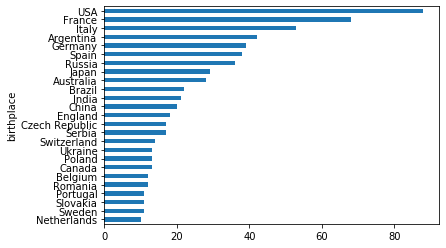

In [268]:
#Ten1.groupby('birthplace')['birthplace'].count().nlargest(25)
Ten1.groupby('birthplace')['birthplace'].count().sort_values(ascending=False)[:25].plot.barh().invert_yaxis()

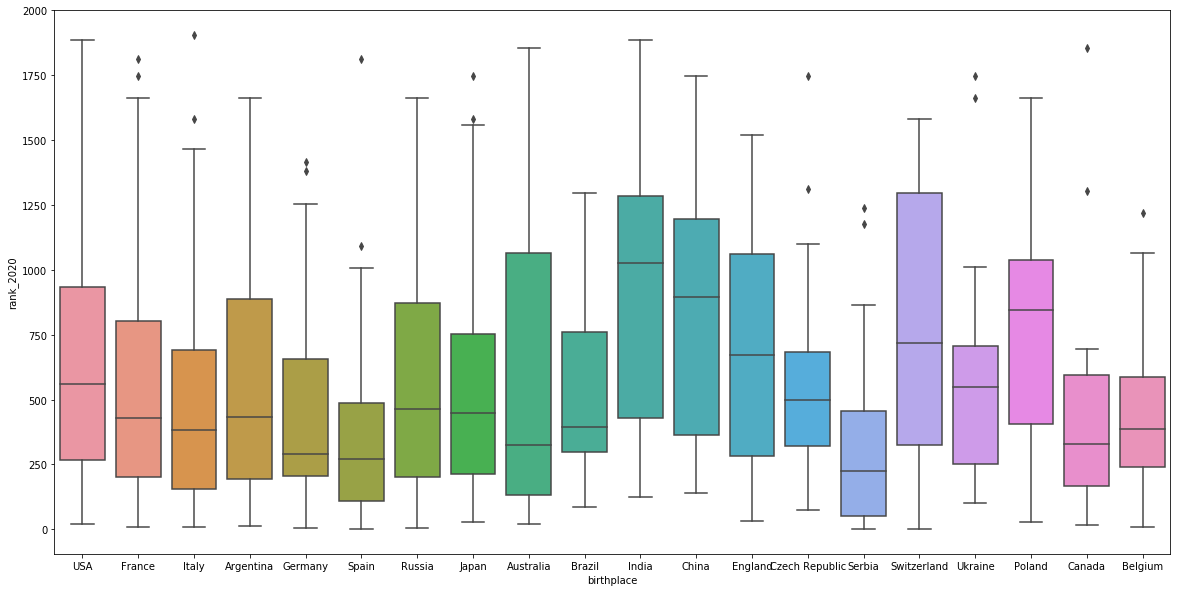

In [378]:
plt.figure(figsize=(20,10))

sorted_nb = Ten1.groupby(['birthplace'])['rank_2020'].count().sort_values(ascending=False)[:20]
sns.boxplot(x=Ten1['birthplace'], y=Ten1['rank_2020'], order=list(sorted_nb.index))

### Countries sorted by lowest ranking

In [269]:
Ten1.groupby('birthplace')['rank_2020'].min().nsmallest(25)
#Ten1.groupby('birthplace')['rank_2020'].min().sort_values()[:25].plot.barh().invert_yaxis()

birthplace
Serbia                 1
Spain                  2
Switzerland            3
Austria                4
Russia                 5
Greece                 6
Germany                7
Italy                  8
France                 9
Belgium               10
Argentina             13
Israel                15
Canada                18
USA                   19
Australia             21
Bulgaria              22
Chile                 25
Georgia               28
Poland                29
Japan                 30
England               31
Croatia               32
Norway                34
Montenegro            37
Bosnia-Herzegovina    39
Name: rank_2020, dtype: int64

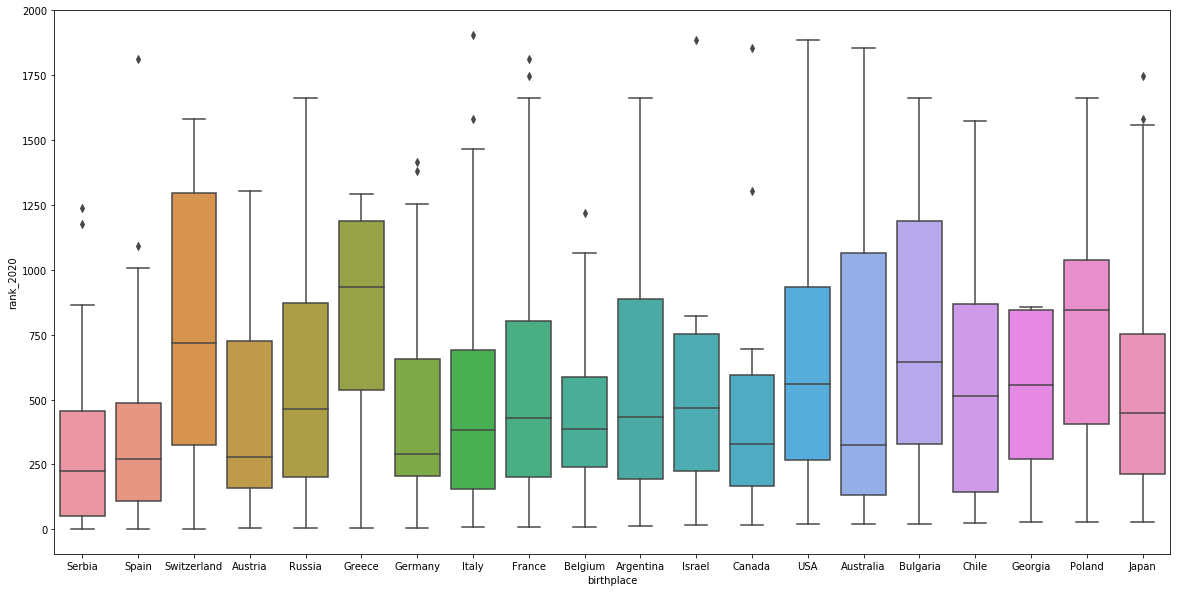

In [379]:
plt.figure(figsize=(20,10))

sorted_nb = Ten1.groupby(['birthplace'])['rank_2020'].min().sort_values(ascending=True)[:20]
sns.boxplot(x=Ten1['birthplace'], y=Ten1['rank_2020'], order=list(sorted_nb.index))

### Left-hand/Backhand 

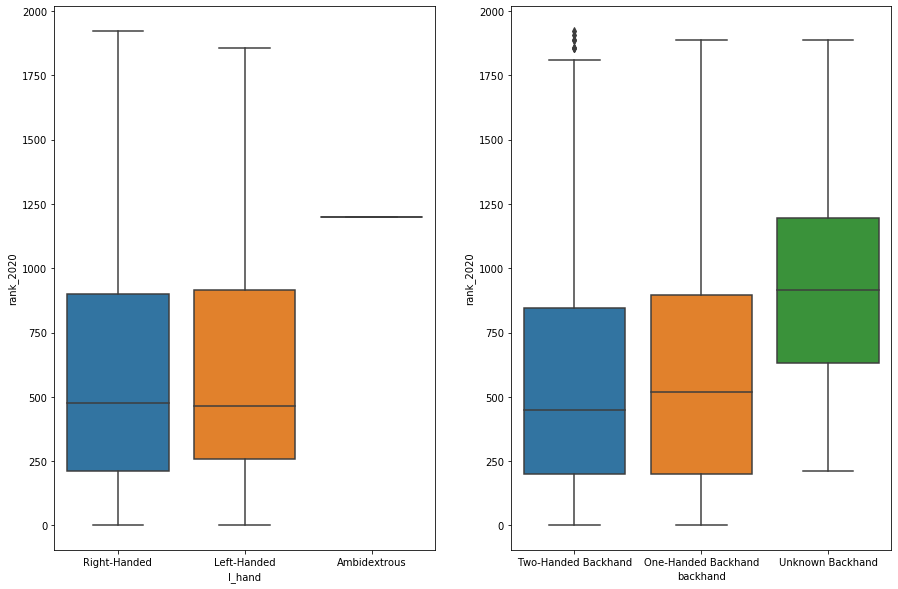

In [380]:
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
for var, subplot in zip(['l_hand', 'backhand'], ax.flatten()):
    sns.boxplot(x=var, y='rank_2020', data=Ten1, ax=subplot)

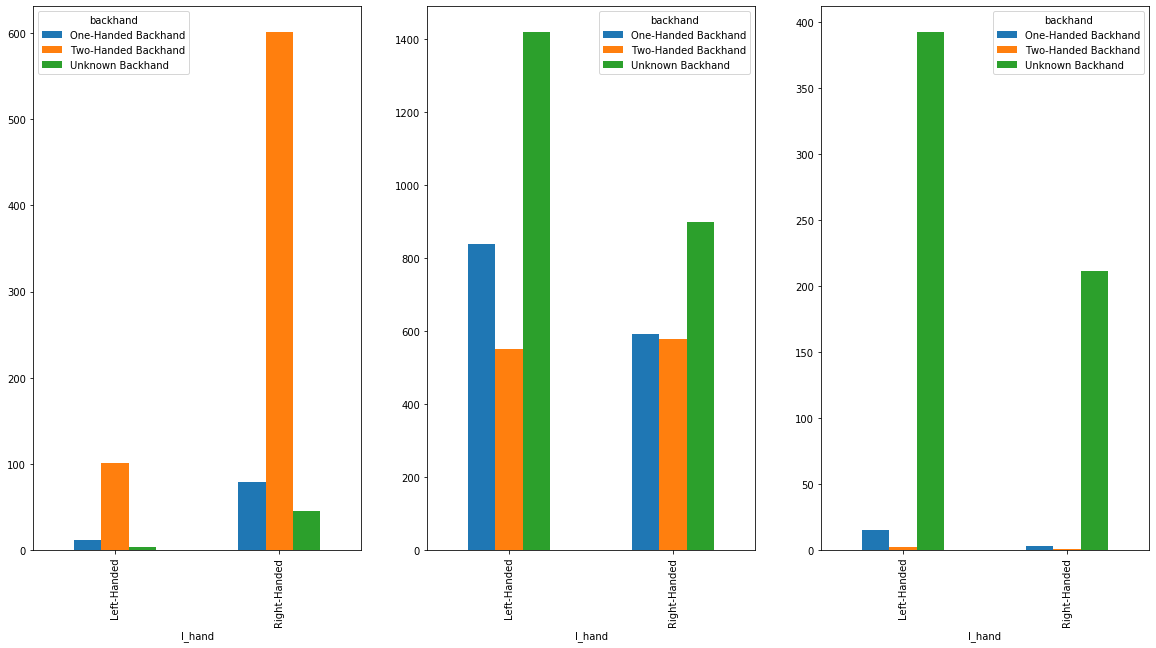

In [377]:
#Ten1.groupby(['backhand', 'l_hand'])['rank_2020'].agg(['count', 'mean', 'min']).sort_values('mean')


#pd.pivot_table(Ten1[Ten1.l_hand != 'Ambidextrous'], values = 'rank_2020', index = 'backhand', columns = 'l_hand',aggfunc ={'count', 'mean', 'min'}).plot.bar(ax=ax)


fig, ax = plt.subplots(1, 3, figsize=(20, 10))
for var, subplot in zip(['count','mean','min'], ax.flatten()):
    Ten1[Ten1.l_hand != 'Ambidextrous'].groupby(['backhand', 'l_hand'])['rank_2020'].agg(var).unstack('backhand').plot(kind='bar', ax=subplot)
#     for label in subplot.get_xticklabels():
#         label.set_rotation(90)

## PCA

In [381]:
Ten1.dtypes

age              float64
backhand          object
birthplace        object
f_name            object
finals_career      int64
ht               float64
l_hand            object
l_name            object
loss_career        int64
prize_career     float64
rank_2020          int64
rank_career        int64
titles_career      int64
win_career         int64
wt               float64
dtype: object

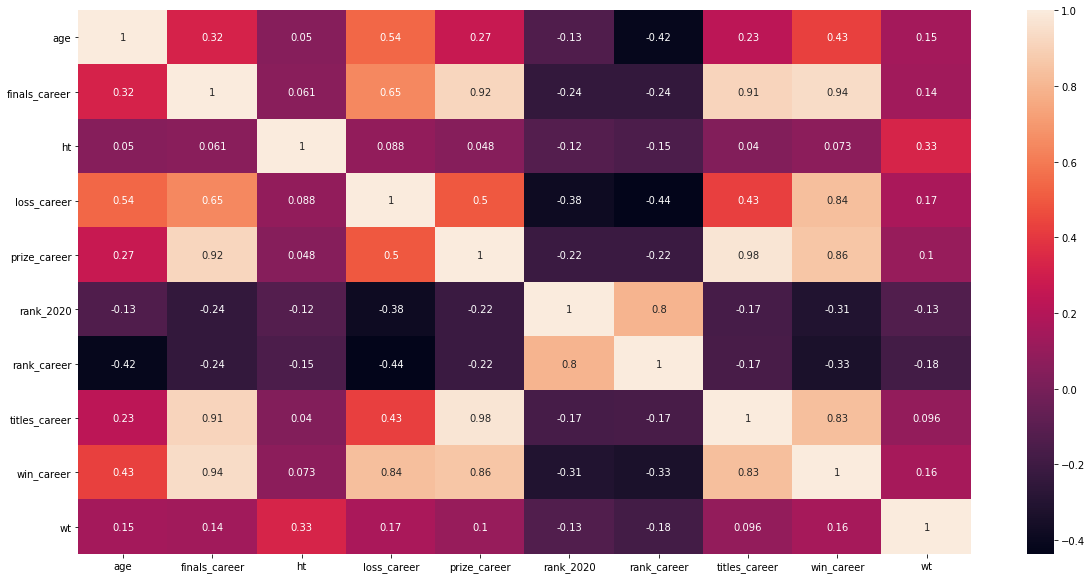

In [278]:
plt.figure(figsize=(20,10))
corr = Ten1.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [345]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler

In [358]:
# Select numeric cols

Ten1_cont = Ten1.select_dtypes([np.number])
Ten1_cont.head(3)

,age,finals_career,ht,loss_career,prize_career,rank_2020,rank_career,titles_career,win_career,wt
0,32.0,34,188.0,187,143059955.0,1,1,78,906,77.0
1,38.0,11,188.0,448,17350913.0,53,12,7,488,88.0
2,22.0,2,198.0,29,1347179.0,55,48,0,25,77.0


In [355]:
# Standardize the continous col before PCA

scaler = StandardScaler()
Ten1_cont_std = scaler.fit_transform(Ten1_cont)

In [357]:
# PCA
pca = PCA(n_components=Ten1_cont_std.shape[1])  

In [359]:
pca.fit(Ten1_cont_std) 
Ten1_pca = pd.DataFrame(pca.transform(Ten1_cont_std), 
columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']) 
Ten1_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,21.328691,9.693992,-1.109932,4.873511,-0.015538,4.688726,-0.102072,2.807830,1.958993,-0.445053
1,7.905777,-1.048808,0.300794,-2.964486,-0.180066,-3.170934,-0.093904,0.076698,0.208602,-0.041080
2,0.334909,-1.105815,-0.030814,1.428205,-0.495979,-0.253839,0.184844,-0.345958,0.166325,0.114210
3,1.151105,-1.411876,0.179833,0.073636,0.116984,-0.059386,-0.101656,0.112336,-0.022928,-0.063595
4,0.251368,-1.158260,0.398485,1.018769,-0.365912,-0.023432,0.047942,0.153796,-0.104014,0.040603
5,1.952745,-1.041196,1.200165,-0.392766,-0.624656,-0.543474,-0.175704,-0.382770,0.310807,0.105849
6,0.330735,-0.788073,1.327341,0.727805,-0.504715,0.259045,-0.072614,-0.136468,-0.030131,0.059715
7,1.035720,-0.994452,1.819230,-0.279877,-0.605810,-0.009043,-0.235738,0.410852,-0.070117,-0.027275
8,8.583856,-0.564966,0.001064,-2.431506,0.088857,-3.313114,0.065352,-1.226884,0.430245,-0.258069
9,3.715366,-0.950308,1.056513,-1.236668,-0.253708,-0.651786,-0.292705,0.291989,-0.277242,-0.017612


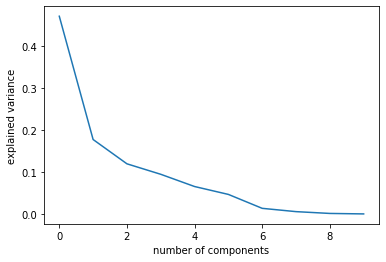

In [360]:
import matplotlib.pyplot as plt 

plt.plot(pca.explained_variance_ratio_) 
plt.xlabel('number of components') 
plt.ylabel('explained variance') 
plt.show() 


In [361]:
loadings = pd.DataFrame(pca.components_.T, 
columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'], index=Ten1_cont.columns) 
loadings  


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
age,0.234281,-0.211463,0.105316,-0.735818,-0.119367,0.484935,-0.310120,-0.044968,-0.001506,-0.016343
finals_career,0.428407,0.222238,-0.040639,0.076103,0.008210,-0.035326,0.015621,-0.775459,0.278966,0.280922
ht,0.062333,-0.261719,-0.671354,0.129137,-0.677859,0.017148,-0.020786,-0.001945,-0.001595,-0.000779
loss_career,0.363552,-0.141940,0.101941,-0.323784,-0.095692,-0.674808,0.088893,0.316409,0.050389,0.396708
prize_career,0.407594,0.271709,-0.048575,0.181043,0.018956,0.249459,-0.005958,0.485033,0.635219,-0.153365
rank_2020,-0.209031,0.503187,-0.252616,-0.462845,-0.069547,0.069133,0.644415,0.010154,0.006225,0.006283
rank_career,-0.230894,0.558392,-0.238892,-0.157103,-0.016036,-0.273765,-0.690418,0.033085,0.012485,0.001733
titles_career,0.392031,0.311558,-0.070015,0.208667,0.033686,0.302635,-0.023393,0.219573,-0.646673,0.375674
win_career,0.444200,0.115487,0.009250,-0.061602,-0.031149,-0.271604,0.051329,-0.107740,-0.312639,-0.773785
wt,0.106692,-0.260805,-0.630808,-0.110669,0.713776,-0.024854,-0.009085,0.015758,0.002673,-0.000293


In [362]:
cov_matrix = np.dot(Ten1_cont_std.T, Ten1_cont_std) / Ten1_cont.shape[0] 
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]  


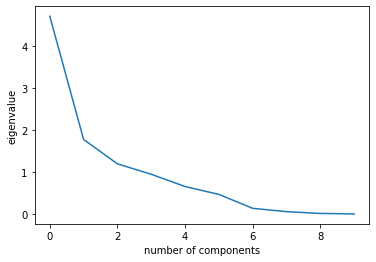

In [363]:
plt.plot(eigenvalues) 
plt.xlabel('number of components') 
plt.ylabel('eigenvalue')  
plt.show() 
